# Ciência de Dados - Projeto 3

## Análise de previsão de doenças cardiovasculares

**Alunas: Gabriela Mitu, Gabriella Cukier, Alexandre Cury**

________

## Introdução

Segundo a organização Pan-Americana da Saúde, doenças cardiovasculares são a principal causa de morte no mundo. Mais de 17 milhões de pessoas morreram por causa delas em 2015, o que representa 31% de todas as mortes em nível global.

A causa de doenças cardiovasculares envolve uma série de variáveis, como arritmias, insuficiência venosa, cardiopatia congênita, entre outras.

Visto a gravidade de tal questão, a previsão de doenças cardiovasculares é considerada um dos mais importantes assuntos na seção de análise de dados clínicos. Desta forma, a mineração de dados transforma a grande coleção de dados brutos de assistência médica em informações que podem auxiliar na tomada de decisões.

Portanto, com o objetivo de apoiar este estudo, foi escolhido este tema de análise de doenças cardiovasculares para o Projeto 3 de Ciência de Dados com a uso de ferramentas como o python para desenvolver um Machine Learning através de um DataSet do repositório da UCI.

O método utilizado será o de aprendizado supervisionado com o intuito de prever um rótulo (se alguém terá ou não a doença  cardíaca).
Para atingir esse objetivo, foram selecionados alguns atributos a serem analisados, contidos nas colunas do dataset.  Eles estão relacionados com exames de pacientes. É importante ressaltar que apenas um destes fatores isolados não é suficiente para o surgimento de uma doença, porém a combinação de alguns pode ser determinante.


•	Idade


•	Sexo(0=Mulher, 1=Homem)


•	Presença de dores no peito


•	Pressão sanguínea em repouso


•	Colesterol


•	Glicemia (Quando maior que 120mg/dl: 1=True, caso contrário: 0=False)



•	Medida do eletrocardiograma em repouso


•	Frequência cardíaca máxima 


•	Dores no peito temporárias causadas por exercícios


•	Anormalidades vistas no eletrocardiograma em período de exercícios



•	Supranivelamento do segmento ST



•	Número de principais vasos sanguíneos  coloridos no exame de fluoroscopia(0-3)


•	Produção anormal de hemoglobina(até 3= normal, entre 3 e 6=defeito irreparável, 7=defeito reversível)



Além disso, o dataset contém a coluna de presença de doenças cardíacas, que será importante para ensinar o classificador.


____
## Mecanismo

A realização do projeto contará com o recurso de Regressão Logística, já frequentemente utilizado nas ciência biológicas, assim como no estudo de doenças cardiovasculares para estudar variáveis independentes. A regressão logística faz predições para lidar com problemas que exigem uma estimativa de probabilidade e tem como "output" - discreto - zero ou um (0/1), além de ser utilizada para calcular a possibilidade de certo evento ocorrer.

Na regressão logística, a probabilidade de ocorrência de um evento pode ser estimada diretamente. Considerando que só há dois "outputs" (0/1) e "p" variáveis independentes, chega-se em:

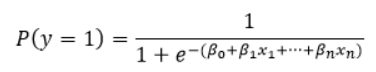

Os coeficiente B0, B1,..., são selecionados de forma que maximize a probabilidade da amostra ter sido observada.

Assim, o gráfico de uma regressão logística fica neste formato:

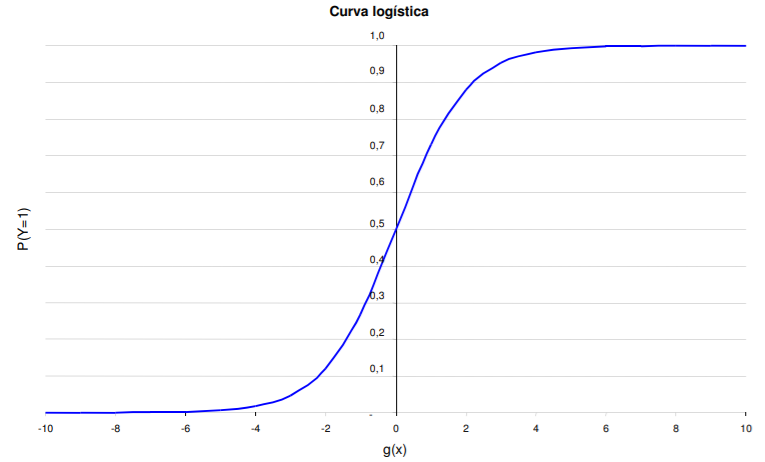

Observa-se ainda que:
- Quando g(x) tende a infinito, P(Y=1) tende a 1
- Quando g(x) tende a menos infinito, P(Y=1) tende a 0

## Uso de Confusion Matrix

Uma ferramenta que será essencial para o projeto é a Confusion Matrix, que é como um preditor de desempenho do modelo em um problema de classificação, ou seja, um npumero de previsões corretas e incorretas é resumida com valores de contagem e repartidos por cada classe. Portanto, ela auxiliará na mensuração do desempenho do modelo - "Accuracy Report".

________
# Import  das libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
dados=pd.read_csv("heart.csv")

_______
## Adaptação do idioma do DataSet 

In [3]:
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Como é possível ver, há um total de 14 colunas, cada uma equivalente a uma variável independente e que será estudada minunciosamente para o desenvolvimento do machine learning e identificar aqueles que apresentam doença cardíaca ou não apresentam.

____
## Análise dos dados

Para se ter uma melhor noção da composição do DataSet escolhido, será plotado um gráfico com a frequência daqueles que sofrem de alguma doença cardiovascular - quer será representado como target: 1 - e daqueles que não sofrem da doença - target: 0.

## Separação das variáveis

O dataset escolhido contém tanto variáveis qualitativas quanto quantitativa, que demandam abordagens anaíticas distintas Portanto, foram separadas para sua análise

In [4]:
var_num=['idade','pressao','freq_card_max','efeito_exercicio','colesterol']
var_cat=[x for x in dados.columns if x not in var_num]

# Análise exploratória

## Target 

In [5]:
target=(dados.diagnostico.value_counts())
target

1    165
0    138
Name: diagnostico, dtype: int64

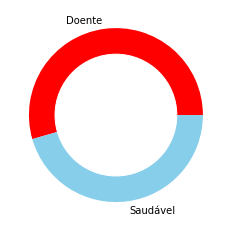

In [6]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(target, labels=('Doente','Saudável'), colors=['red','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

A partir do gráfico e codificação nas células anteriores, é possível observar que a frequência de ambos os grupos está visualmente equilibrada, o que será importante para o desenvolvimento do machine learning

## Variáveis quantitativas

In [7]:
dados[var_num].describe()

,idade,pressao,freq_card_max,efeito_exercicio,colesterol
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,149.646865,1.039604,246.264026
std,9.082101,17.538143,22.905161,1.161075,51.830751
min,29.000000,94.000000,71.000000,0.000000,126.000000
25%,47.500000,120.000000,133.500000,0.000000,211.000000
50%,55.000000,130.000000,153.000000,0.800000,240.000000
75%,61.000000,140.000000,166.000000,1.600000,274.500000
max,77.000000,200.000000,202.000000,6.200000,564.000000


In [13]:
corrdados=dados[var_num].corr()

In [14]:
var_num=['idade','pressao','freq_card_max','efeito_exercicio','colesterol']
var_cat=[x for x in dados.columns if x not in var_num]

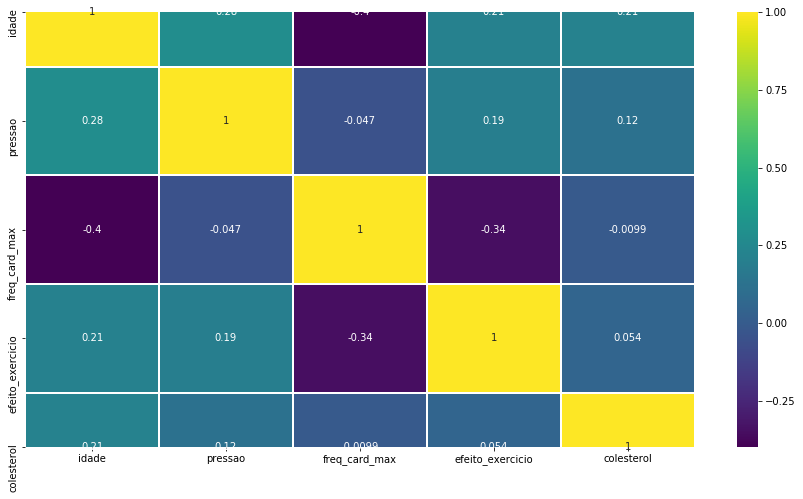

In [15]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(corrdados, annot = True, cmap='viridis', linecolor='white',  linewidths=1)
plt.show()

# plot using a color palette
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
 
#add this after your favorite color to show the plot
#sns.plt.show()

A tabela acima indica as relações entre as variáveis quantitativas do dataset, atreladas à aquisição de doenças cardíacas. Percebe-se que a maior parte das variáveis possui um efeito mediano a pequeno nas outras. Isoladamente, nenhuma delas tem um grande efeito na determinação de outra característica referente à saúde do sujeito. Por conta disso, a previsão de possíveis doenças cardíacas deve levar em conta multiplos fatores.

Agumas variáveis, entretanto, chamam a atenção por possuirem uma correlação maior em módulo, com cerca de de 0,4. É o caso, principalmente, díaca máxima em relação à idade e ao efeito do exercício.

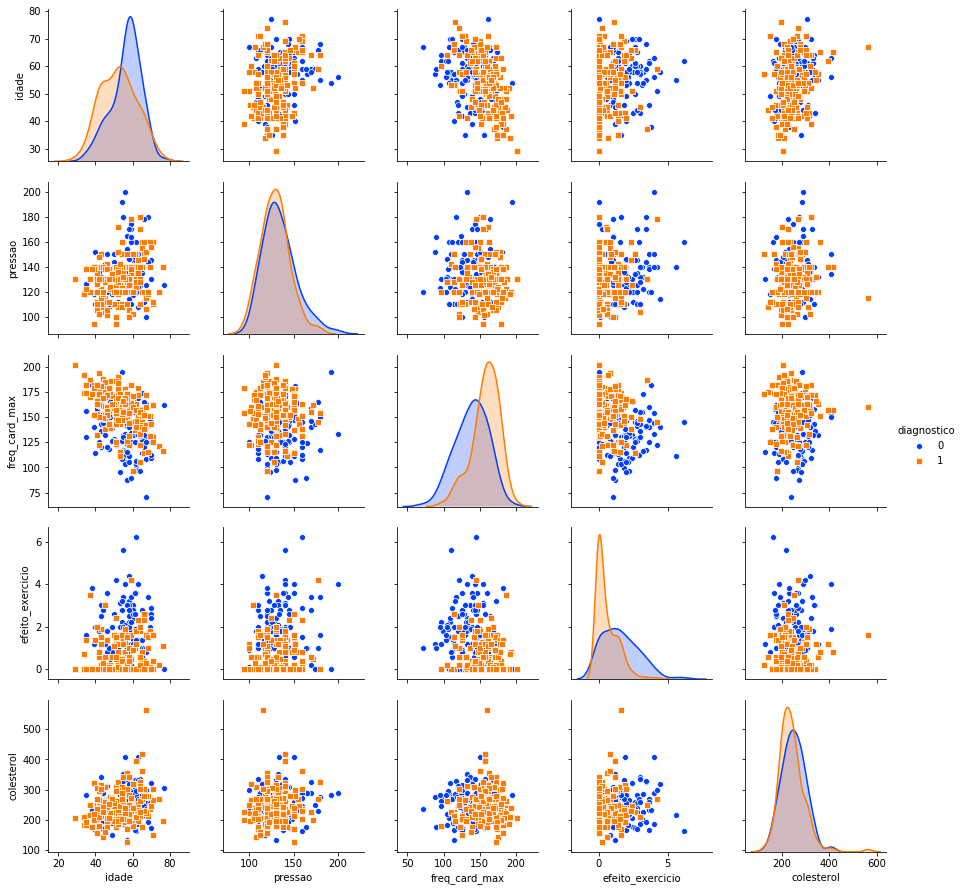

In [18]:
sns.pairplot(dados, hue = 'diagnostico', markers=["o", "s"], vars = [v for v in var_num], palette = sns.color_palette("bright", 10))

O gráfico de dispersão acima compara os atributos relacionados à aquisição de doenças cardíacas de pessoas doentes (em laranja) e saudáveis(em azul). Percebe-se que no caso de alguns atributos não há uma diferença significativa na distribuição estatística entre pessoas que possuem a doença cardiovascular e as que não. Este é o caso da pressão sanguínea e do colesterol, para os quais as curvas de distribuição dos dados de ambos os grupos praticamente se sobrepõem.

Para o caso de outros atributos, há uma distinção evidente nas características de pessoas que possuem ou não doenças. É o caso da idade, da frequência cardíaca máxima e, principalmente, do efeito do exercício. A diferença nessa distribuição fica mais evidente nos histogramas e na tabela a seguir:

In [12]:
from pandas import DataFrame
d=doente[var_num].mean()
s=saudavel[var_num].mean()
df = DataFrame((d), columns= ['Doente'])
df2 = DataFrame((s), columns= ['Saudável'])

df = df.join(df2, how='inner', lsuffix=' ', rsuffix=' ')
df
sns.set(font_scale=1.2)


#sns.heatmap(df, annot=True,cmap="YlGnBu")
df

NameError: name 'doente' is not defined

In [ ]:
doente=dados[dados['diagnostico']==1]
saudavel=dados[dados['diagnostico']==0]


def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    


def draw_histograms(dataframe, dataframe2, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plot1=dataframe[feature].hist(bins=20,ax=ax,color='indigo', alpha=0.5, label='Doente')
        plot2=dataframe2[feature].hist(bins=20,ax=ax,color='turquoise', alpha=0.5, label='Saudável')
        verticalLine(plot1, dataframe[feature].mean(), 5, "purple", "Média Doentes")
        verticalLine(plot2, dataframe2[feature].mean(), 10, "green", "Média Saudáveis")

        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(doente[var_num],saudavel[var_num],saudavel[var_num].columns,6,2)

No caso da pressão e do colesterol, a média dos valores de pessoas doentes e saudáveis é muito próxima, o que sustenta aquilo demonstrado no gráfico de dispersão acima. Isso significa que essas variáveis não são as mais importantes na classificação da aquisição da doença.

No caso da idade, nota-se que a maior parte dos indivíduos no estudo que possuia a doença era mais jovem que aqueles isentos. Além disso, os primeiros possuem em média cerca de 52 anos. 
Isso indica que as doenças cardiovasculares são mais comuns nesta faixa etária, no início dos 50 anos.

## Variáveis qualitativas

In [ ]:
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

In [ ]:
def categ(x):
    dados[x] = dados[x].astype('category')

categ('sexo')

dados.sexo.cat.categories = ({ 0:'Mulher', 1:'Homem'})
categ('dores_peito')
dados.dores_peito.cat.categories = ({1:'Angina normal', 2:'Angina anormal', 3:'Dor não anginosa', 4:'Assintomático'})
categ('glicemia')
dados.glicemia.cat.categories = ({0:'<=120mg/dl', 1:'>120mg/dl'})
categ('eletrocar_repouso')
dados.eletrocar_repouso.cat.categories = ({0:'Normal', 1:'Problema', 2:'Hipertrofia'})#################
categ('angina_exercicio')
dados.angina_exercicio.cat.categories = ({0:'Não', 1:'Sim'})
categ('eletrocar_exercicio')
dados.eletrocar_exercicio.cat.categories = ({1:'Crescente', 2:'Constante', 3:'Decrescente'})
#categ('vasos') -> Já contém o número de vasos coloridos no exame
#categ('hemoglobina')
#dados.hemoglobina.cat.categories = ('Mulher', 'Homem')
categ('diagnostico')
dados.diagnostico.cat.categories = ({0:'Não tem', 1:'Tem'})


In [ ]:
def draw_plot(features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    ax=fig.add_subplot(rows,cols)
    ct3=pd.crosstab(dados[feature],dados.diagnostico,margins=True,rownames=[feature], colnames=['target']).apply(percConvert, axis=0)
    plot=sns.heatmap(ct3, annot=True)

    plot2=ct2.plot(kind='bar')

        
    fig.tight_layout()  
    plt.show()
draw_plot('sexo', 1,2)

In [ ]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)


fig=plt.figure(figsize=(10,5))
plt.subplot(121)

ct3=pd.crosstab(dados.sexo,dados.diagnostico,margins=True,rownames=['sexo'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True)

ct2=ct3
ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)
ct2.plot(kind='bar', color=('yellow', 'salmon'))
plt.ylabel('Frequência Relativa (em %)')

Percebe-se que o total de homens é maior. Além disso, A incidência de ataques cardíacos em homens é mais alta. Isso condiz com dados do estudo "The heart attack gender gap", da Harvard Medical School. Segundo o estudo, indivíduos do gênero masculino, além de serem mais propensos à aquisição de doenças cardíacas, demonstram sintomas quando mais jovens. As mulheres, por sua vez, são geralmente mais velhas ao adquirirem a doença, com cerca de 60 a 70 anos. Desse modo, como o estudo foi realizado com pessoas de média de 54 anos, é de se esperar que a porcentagem de homens doentes seja superior.

In [ ]:
ct3=pd.crosstab(dados.glicemia,dados.diagnostico,margins=True,rownames=['glicemia'], colnames=['target']).apply(percConvert, axis=0)


ct2=ct3
ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)

plot=sns.heatmap(ct3, annot=True)
plot2=sns.catplot(y="diagnostico", hue="glicemia", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

#plot2=ct2.plot(kind='bar', color=('yellow', 'salmon'))

plt.ylabel('Frequência Relativa (em %)')

plt.tight_layout()
plt.show()
    

Percebe-se que o nível de glicose no sangue é parecido para os indivídous estudados. Isso indica que o nível de glicose como medido no estudo (parâmetro de 120mg/dl) não é determinante na presença de doenças cardíacas. O estudo "Is there a link between glucose levels and heart failure? " aponta que a glicemia é importante para a aquisição de tais doenças, porém, vincula os problemas de saúde à hiperglicemia (acima de 150mg/dl). Além disso, tais problemas seriam mais comuns em pacientes que possuem diabetes a longo prazo. Portanto, conclui-se que para uma melhor exatidão, os parâmetros do dataset referentes a tal variável poderiam ser mais precisos se uma variável quantitativa tivesse sido usada, distinguindo casos de glicemia muito alta daqueles com valores próximos a 120.

In [ ]:
ct3=pd.crosstab(dados.eletrocar_repouso,dados.diagnostico,margins=True,rownames=['eletrocardiograma repouso'], colnames=['target']).apply(percConvert, axis=0)


ct2=ct3
ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)

plot=sns.heatmap(ct3, annot=True)


plot2=sns.catplot(y="diagnostico", hue="eletrocar_repouso", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

plt.show()

In [ ]:
ct32=pd.crosstab(dados.eletrocar_exercicio,dados.diagnostico,margins=True,rownames=['eletrocardiograma exercício'], colnames=['target']).apply(percConvert, axis=0)


ct32 = (ct32/ct32.sum().sum()*100).round(decimals=0)

plot3=sns.heatmap(ct32, annot=True)


plot4=sns.catplot(y="diagnostico", hue="eletrocar_exercicio", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

#plt.tight_layout()
plt.show()
    

In [ ]:
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



sns.catplot(y="diagnostico", hue="glicemia", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

In [ ]:

ct3=pd.crosstab(dados.angina_exercicio,dados.diagnostico,margins=True,rownames=['angina_exercicio'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True,  cmap="Greens")
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='angina_exercicio')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [ ]:

ct3=pd.crosstab(dados.dores_peito,dados.diagnostico,margins=True,rownames=['dores_peito'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True,  cmap="Greens")
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='dores_peito')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.vasos,dados.diagnostico,margins=True,rownames=['vasos'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True, cmap="YlGnBu")

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='vasos')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




In [ ]:
#sexo
#glicemia, 
#eletrocar_repouso, eletrocar exercicio
# angina_exercicio, dores_peito
#vasos, hemoglobina

In [ ]:


print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.eletrocar_repouso,dados.diagnostico,margins=True,rownames=['eletrocar_repouso'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True,  cmap="BuPu")
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.angina_exercicio,dados.diagnostico,margins=True,rownames=['angina_exercicio'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True, cmap="Blues")

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.eletrocar_exercicio,dados.diagnostico,margins=True,rownames=['eletrocar_exercicio'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True)

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.glicemia,dados.diagnostico,margins=True,rownames=['glicemia'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True)

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
dados.isnull().sum()


In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

In [ ]:
print ("Quantidade treinamento dos atributos: " + str(X_train.shape))
print ("Quantidade treinamento do target: " + str(y_train.shape))
print ("Quantidade teste dos atributos: " + str(X_test.shape))
print ("Quantidade teste do target: " + str(y_test.shape))

In [ ]:
conta_treinamento = pd.Series(y_train).value_counts()
conta_treinamento


In [ ]:
conta_teste = pd.Series(y_test).value_counts()
conta_teste

In [ ]:
conta_treinamento[True] / conta_treinamento[False]

In [ ]:
conta_teste[True] / conta_teste[False]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs', multi_class='auto')


In [ ]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
dados.head()

____________________________________________
# Outros Algoritmos

In [ ]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [ ]:
#Pode retirar

model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [ ]:
#Pode retirar

model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

In [ ]:
# Pode retirar (já tem informação na ultima tabela)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

## K-Nearest Neighbor(KNN)

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[6]*100, 7))


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

In [ ]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

## Tree Classifier

A fim de aperfeiçoar a análise sobre o assunto, é possível ainda utilizar um outro algoritmo: o **Tree Classifier**, com o qual é possível até realizar uma melhor análise interpretativa.

In [ ]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

## Algoritmos e Acurácias

Após os testes com diferentes modelos de algoritmos, é possível observar qual deles foi o melhor a otimizar o machine learning, além de prever a relativa acurácia de um modelo de forma resumida com a seguinte codificação:

In [ ]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
    
    
    
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

Com esta tabela, é possível concluir que o melhor modelo a ser trabalhado, pelo menos neste caso em particular, é realmente o K-Nearest Neighbor(KNN)

__________________
## Referências

https://www.paho.org/bra/index.php?option=com_content&view=article&id=5253:doencas-cardiovasculares&Itemid=1096
https://www.health.harvard.edu/heart-health/the-heart-attack-gender-gap